In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']

In [3]:
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

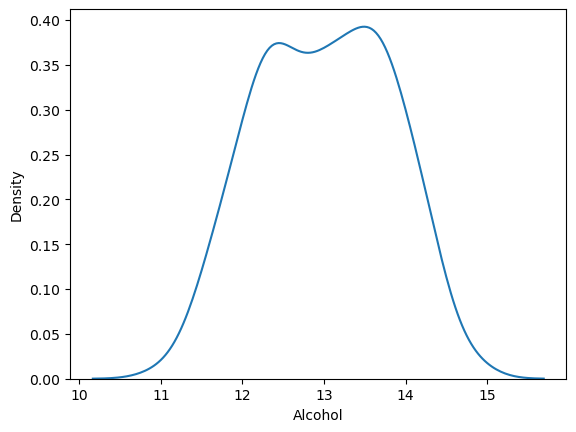

In [4]:
sns.kdeplot(df["Alcohol"])

<Axes: xlabel='Malic acid', ylabel='Density'>

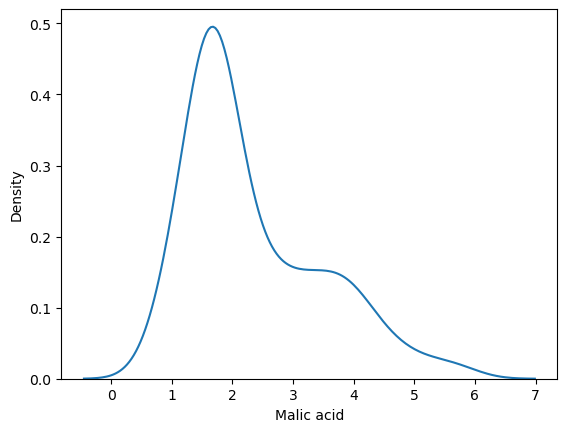

In [5]:
sns.kdeplot(df["Malic acid"])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

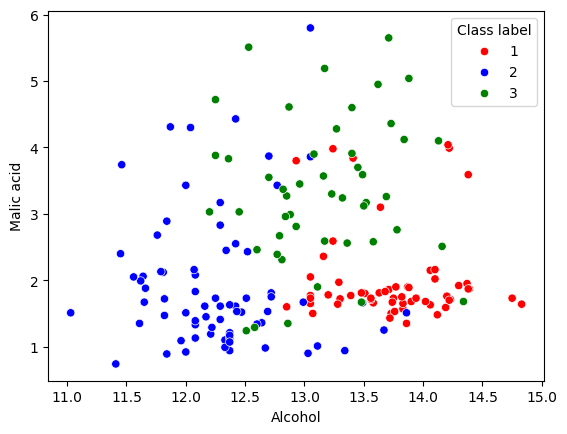

In [6]:
color_dict={1:'red',3:'green',2:'blue'}
sns.scatterplot(x=df["Alcohol"], y=df["Malic acid"],palette=color_dict ,hue=df["Class label"])

In [7]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("Class label", axis=1), df["Class label"], test_size=.3, random_state=0)

X_train.shape, X_test.shape

((124, 2), (54, 2))

22     1
108    2
175    3
145    3
71     2
      ..
103    2
67     2
117    2
47     1
172    3
Name: Class label, Length: 124, dtype: int64

In [28]:
X_train

,Alcohol,Malic acid
22,13.71,1.86
108,12.22,1.29
175,13.27,4.28
145,13.16,3.57
71,13.86,1.51
...,...,...
103,11.82,1.72
67,12.37,1.17
117,12.42,1.61
47,13.90,1.68


In [10]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

scaler.fit(X_train)


X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [23]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [15]:
X_train_scaled

,Alcohol,Malic acid
0,0.720430,0.203782
1,0.319892,0.084034
2,0.602151,0.712185
3,0.572581,0.563025
4,0.760753,0.130252
...,...,...
119,0.212366,0.174370
120,0.360215,0.058824
121,0.373656,0.151261
122,0.771505,0.165966


In [17]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


In [18]:
np.round(X_test_scaled.describe(),1)

,Alcohol,Malic acid
count,54.0,54.0
mean,0.5,0.3
std,0.2,0.2
min,0.1,-0.0
25%,0.4,0.1
50%,0.5,0.2
75%,0.7,0.4
max,1.0,1.0


[]

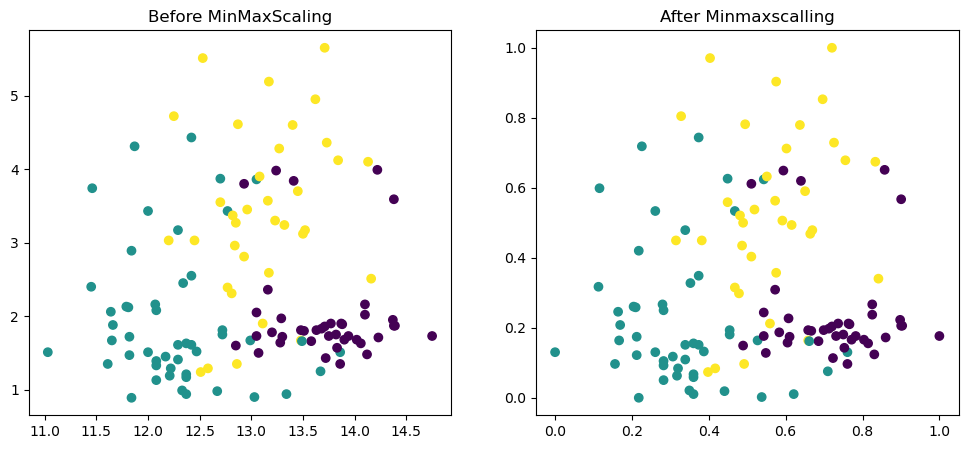

In [27]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Before MinMaxScaling")
ax1.scatter(x=X_train["Alcohol"], y=X_train["Malic acid"],c=y_train)

ax2.set_title("After Minmaxscalling")
ax2.scatter(x=X_train_scaled["Alcohol"], y=X_train_scaled["Malic acid"],c=y_train)

plt.plot()

[]

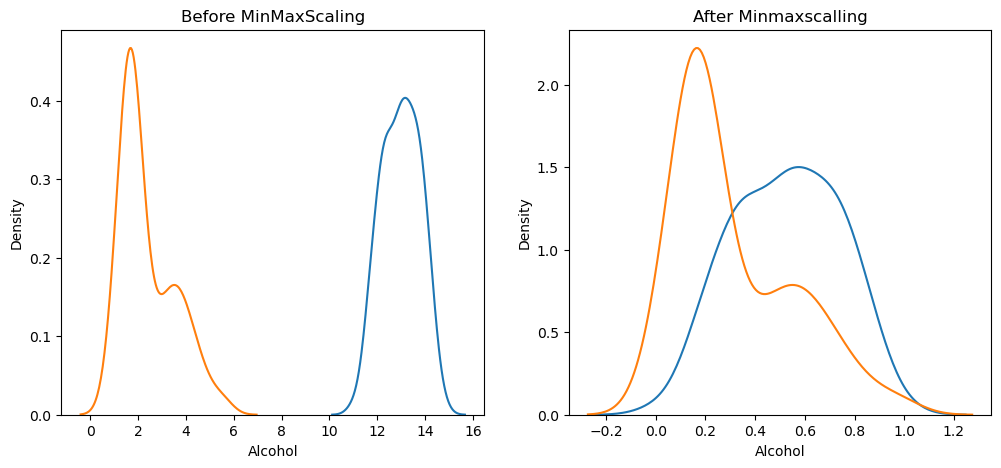

In [36]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Before MinMaxScaling")
sns.kdeplot(x=X_train["Alcohol"], ax=ax1)
sns.kdeplot(x=X_train["Malic acid"], ax=ax1)

ax2.set_title("After Minmaxscalling")
sns.kdeplot(x=X_train_scaled["Alcohol"],ax=ax2)
sns.kdeplot(x=X_train_scaled["Malic acid"],ax=ax2)

plt.plot()

[]

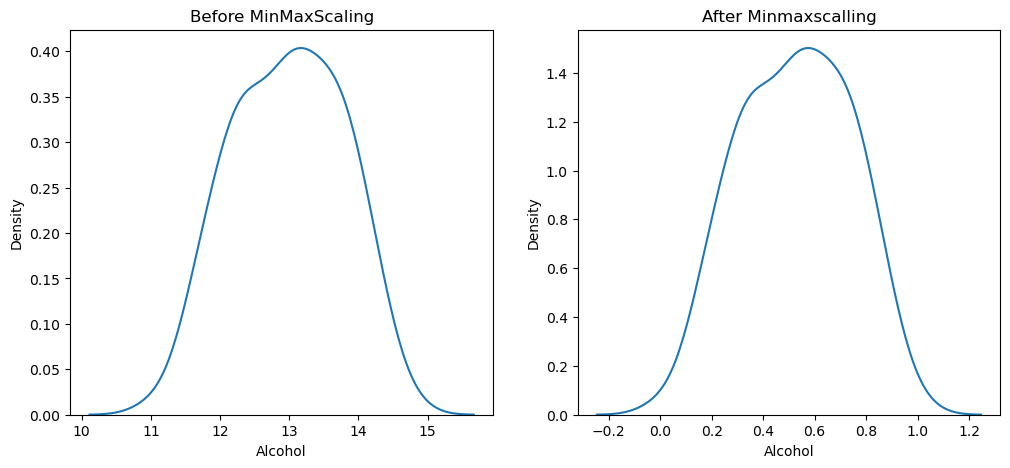

In [37]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Before MinMaxScaling")
sns.kdeplot(x=X_train["Alcohol"], ax=ax1)


ax2.set_title("After Minmaxscalling")
sns.kdeplot(x=X_train_scaled["Alcohol"],ax=ax2)

plt.plot()

[]

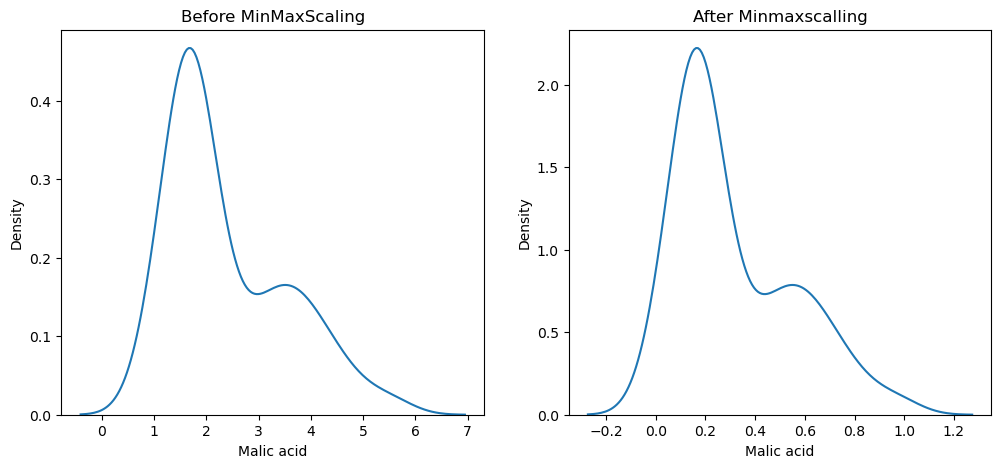

In [38]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Before MinMaxScaling")

sns.kdeplot(x=X_train["Malic acid"], ax=ax1)

ax2.set_title("After Minmaxscalling")
sns.kdeplot(x=X_train_scaled["Malic acid"],ax=ax2)

plt.plot()